# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter
from scipy.stats import shapiro 

dfQuick16 = pd.read_csv("CleanData/Quick-400runsClean-PC16.csv")

dfRead16 = pd.read_csv("CleanData/ReadCSVClean-PC16.csv")
dfQuick16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,4.396484,3.866089,0.213867,424.846,64.0,best,25000.0
1,4.326294,3.802795,0.212158,418.592,64.0,best,25000.0
2,4.566711,4.002136,0.215454,470.242,64.0,best,25000.0
3,4.493408,3.941650,0.214966,455.232,64.0,best,25000.0
4,4.564880,3.991516,0.213379,497.503,64.0,best,25000.0


In [2]:
dfRead16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,2.240601,1.966187,0.134399,227.880,53.0,random1,25000
1,2.062317,1.775085,0.126160,250.212,53.0,random1,25000
2,2.140869,1.876709,0.121887,222.526,53.0,random1,25000
3,2.217102,1.940735,0.133545,226.620,53.0,random1,25000
4,2.058533,1.796814,0.119385,219.516,53.0,random1,25000


In [3]:
def calcMean(df,type,size):
    meandf = df[df["Input case"] == type][df["Size"]==size].mean()
    meandf["Input case"] = type
    return meandf

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        if case != "worst":
            for size in s:
                l.append(calcMean(df, case, size))  
        else :
            for size in [25000,50000,75000,100000,200000,300000,40000,500000]:
                l.append(calcMean(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

dfQuickMean16 = mean_of_dataset(dfQuick16)
dfQuickMean16.head()

<ipython-input-3-37a79081b241>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,4.48754,3.92696,0.216488,463.748,64,25000,best
1,6.60104,5.77747,0.28219,737.9,64.2222,50000,best
2,8.71006,7.64023,0.341715,994.702,64.5833,75000,best
3,11.1021,9.73918,0.406585,1304.07,65.1111,100000,best
4,19.5232,17.1352,0.650694,2389.13,65.8519,200000,best


In [4]:

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(calcMean(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans

dfReadMean16 = mean_of_dataset_readCSV(dfRead16)


<ipython-input-3-37a79081b241>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()


In [5]:
dfQuickMean16 = dfQuickMean16.reset_index(drop=True)
dfReadMean16 = dfReadMean16.reset_index(drop=True)
dfQuickMean16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,4.48754,3.92696,0.216488,463.748,64,25000,best
1,6.60104,5.77747,0.28219,737.9,64.2222,50000,best
2,8.71006,7.64023,0.341715,994.702,64.5833,75000,best
3,11.1021,9.73918,0.406585,1304.07,65.1111,100000,best
4,19.5232,17.1352,0.650694,2389.13,65.8519,200000,best


In [6]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]

In [7]:
def deductReadFromAlg(meanC, meanR):
    lc = []
    lt = []
    lm = []

    for i in range(len(meanC["Size"])):
        case = meanC["Input case"][i]
        size = meanC["Size"][i]
        if case == "best":
            case2 = "quickbest"
        if case == "worst":
            case2 = "reversesorted"
        if case.startswith("random"):
            case2 = "random"+case.split("m")[-1]

        Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
        Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lc.append((Cc-Rc)/400)

        Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
        Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lt.append((Ct-Rt)/400)

        Cm = meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        lm.append((Cm-Rm)/400)

    meanC["CPU - readCSV"] = lc
    meanC["Time - readCSV"] = lt
    meanC["Memory - readCSV"] = lm


deductReadFromAlg(dfQuickMean16, dfReadMean16)
print




<ipython-input-7-203c25cc64d4>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
<ipython-input-7-203c25cc64d4>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
<ipython-input-7-203c25cc64d4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
<ipython-input-7-203c25cc64d4>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time 

<function print>

# Shapiro Wilks Test 

In [8]:
dfQuick16

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,4.396484,3.866089,0.213867,424.846,64.0,best,25000.0
1,4.326294,3.802795,0.212158,418.592,64.0,best,25000.0
2,4.566711,4.002136,0.215454,470.242,64.0,best,25000.0
3,4.493408,3.941650,0.214966,455.232,64.0,best,25000.0
4,4.564880,3.991516,0.213379,497.503,64.0,best,25000.0
...,...,...,...,...,...,...,...
725,320.330994,277.220337,9.595825,46171.800,61.0,random10,900000.0
726,344.648315,298.666748,10.122620,49438.900,55.0,random10,900000.0
727,359.739807,311.416016,10.789001,51801.400,61.0,random10,1000000.0
728,369.317993,319.709045,11.041138,53394.700,55.0,random10,1000000.0


In [9]:
dfQuickSortRandom1 = dfQuick16[dfQuick16["Input case"].str.endswith("random1")]
print(dfQuickSortRandom1)

        PKG (J)     CPU (J)   DRAM (J)  Time (ms)  Temp (C) Input case  \
341    9.745178    8.447754   0.384766    1238.98      63.0    random1   
342   10.062805    8.794312   0.401794    1170.99      63.0    random1   
343    9.318176    8.159607   0.311707    1162.87      62.0    random1   
344   17.483582   15.111816   0.549255    2448.06      60.0    random1   
345   17.194580   14.962463   0.521362    2329.66      60.0    random1   
346   17.127686   14.885376   0.528259    2343.32      60.0    random1   
347   25.646851   22.268311   0.775696    3509.21      62.0    random1   
348   26.379700   22.938660   0.768738    3676.43      63.0    random1   
349   26.760681   23.280579   0.778809    3680.30      62.0    random1   
350   33.422241   28.993713   0.959656    4730.92      56.0    random1   
351   35.240540   30.650391   1.047180    4901.58      56.0    random1   
352   34.736145   30.185852   0.988159    4910.36      56.0    random1   
353   69.169861   60.152039   1.875916

In [10]:
dfQuickSortRandom2 = dfQuick16[dfQuick16["Input case"].str.startswith("random2")]
dfQuickSortRandom3 = dfQuick16[dfQuick16["Input case"].str.startswith("random3")]
dfQuickSortRandom4 = dfQuick16[dfQuick16["Input case"].str.startswith("random4")]
dfQuickSortRandom5 = dfQuick16[dfQuick16["Input case"].str.startswith("random5")]
dfQuickSortRandom6 = dfQuick16[dfQuick16["Input case"].str.startswith("random6")]
dfQuickSortRandom7 = dfQuick16[dfQuick16["Input case"].str.startswith("random7")]
dfQuickSortRandom8 = dfQuick16[dfQuick16["Input case"].str.startswith("random8")]
dfQuickSortRandom9 = dfQuick16[dfQuick16["Input case"].str.startswith("random9")]
dfQuickSortRandom10 = dfQuick16[dfQuick16["Input case"].str.startswith("random10")]
print(dfQuickSortRandom10)

        PKG (J)     CPU (J)   DRAM (J)  Time (ms)  Temp (C) Input case  \
691    9.530029    8.241516   0.370300    1233.07      60.0   random10   
692    9.251465    8.009827   0.365051    1208.49      60.0   random10   
693    9.627197    8.411621   0.379578    1132.64      59.0   random10   
694   18.006775   15.600647   0.548157    2493.16      59.0   random10   
695   18.540649   16.148682   0.610107    2434.10      60.0   random10   
696   18.179871   15.832581   0.570801    2437.58      61.0   random10   
697   24.543762   21.338562   0.725708    3368.30      61.0   random10   
698   24.614746   21.408875   0.721558    3392.31      61.0   random10   
699   24.551819   21.358398   0.729858    3415.14      60.0   random10   
700   33.068359   28.719299   0.942932    4656.36      62.0   random10   
701   34.299500   29.883240   0.974670    4761.54      62.0   random10   
702   33.071167   28.792664   0.942383    4628.63      62.0   random10   
703   64.817688   56.315369   1.806335

In [11]:
dfQuickSortBest16 = dfQuick16[dfQuick16["Input case"].str.startswith("best")]
#dfQuickSortWorst16 = dfQuick16[dfQuick16["Input case"].str.startswith("worst")]
dfQuickSortRandom16 = dfQuick16[dfQuick16["Input case"].str.startswith("random")]

print(dfQuickSortBest16)

       PKG (J)    CPU (J)  DRAM (J)  Time (ms)  Temp (C) Input case       Size
0     4.396484   3.866089  0.213867    424.846      64.0       best    25000.0
1     4.326294   3.802795  0.212158    418.592      64.0       best    25000.0
2     4.566711   4.002136  0.215454    470.242      64.0       best    25000.0
3     4.493408   3.941650  0.214966    455.232      64.0       best    25000.0
4     4.564880   3.991516  0.213379    497.503      64.0       best    25000.0
..         ...        ...       ...        ...       ...        ...        ...
336  85.868652  73.624390  3.680725  10978.100      61.0       best  1000000.0
337  85.119080  72.824768  3.693115  10952.400      61.0       best  1000000.0
338  92.474243  79.504028  3.830383  11865.900      62.0       best  1000000.0
339  92.084778  79.048645  3.840820  11878.200      61.0       best  1000000.0
340  90.136536  77.255798  3.794678  11590.700      63.0       best  1000000.0

[341 rows x 7 columns]


In [12]:
data = []
size = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfQuickMean16[dfQuickMean16["Size"]==i]["CPU (J)"]).pvalue:
        data.append(1)
    else:
        data.append(0)
    size.append(i)
    print(shapiro(dfQuickMean16[dfQuickMean16["Size"]==i]["CPU (J)"]).pvalue)
print(data)

9.580511459716945e-07
1.5840835203562165e-06
3.892592303600395e-06
2.7081250664195977e-07
1.4347895671562583e-07
5.689249746865244e-07
1.5698456081736367e-06
1.469584418600789e-07
8.390046559725306e-07
3.4842625495912216e-07
8.960502668742265e-07
1.4069711085085146e-07
1.7251950623631274e-07
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
dataBest = []
sizeBest = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfQuickSortBest16[dfQuickSortBest16["Size"]==i]["CPU (J)"]).pvalue:
        dataBest.append(1)
    else:
        dataBest.append(0)
    sizeBest.append(i)
    print(shapiro(dfQuickSortBest16[dfQuickSortBest16["Size"]==i]["CPU (J)"]).pvalue)
print(dataBest)

0.27855491638183594
0.9220972061157227
0.37662941217422485
0.5048016309738159
0.005593802779912949
0.4148359000682831
0.8979208469390869
0.2653730809688568
0.9982200264930725
0.7556579113006592
0.17103923857212067
0.00020018883515149355
0.008304305374622345
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0]


In [14]:
dataRandom = []
sizeRandom = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfQuickSortRandom16[dfQuickSortRandom16["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom.append(1)
    else:
        dataRandom.append(0)
    sizeRandom.append(i)
    print(shapiro(dfQuickSortRandom16[dfQuickSortRandom16["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom)
#make for each random

0.5265910625457764
0.020440274849534035
0.00011632541281869635
0.22720147669315338
0.038281310349702835
0.6557552814483643
0.006467602215707302
0.03933396190404892
0.23274527490139008
0.04179774969816208
0.008463266305625439
0.000549027172382921
0.008662333711981773
[1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0]


In [15]:
dataRandom1 = []
sizeRandom1 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfQuickSortRandom1[dfQuickSortRandom1["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom1.append(1)
    else:
        dataRandom1.append(0)
    sizeRandom1.append(i)
    print(shapiro(dfQuickSortRandom1[dfQuickSortRandom1["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom1)


0.8986175060272217
0.652002215385437
0.6463379263877869
0.5257147550582886
0.5310466289520264
0.41469302773475647
0.029948096722364426
0.014695377089083195
0.5736836194992065
0.06547554582357407
0.5590096712112427
0.610017716884613
0.08926531672477722
[1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]


In [16]:
dataRandom2 = []
sizeRandom2 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfQuickSortRandom2[dfQuickSortRandom2["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom2.append(1)
    else:
        dataRandom2.append(0)
    sizeRandom2.append(i)
    print(shapiro(dfQuickSortRandom2[dfQuickSortRandom2["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom2)

0.4511083960533142
0.3909153342247009
0.5889957547187805
0.22528988122940063
0.11703936755657196
0.7108652591705322
0.8032013773918152
0.9869598746299744
0.3579804003238678
0.33844447135925293
0.1550673544406891
0.9463086128234863
0.03924284502863884
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


In [17]:
dataRandom3 = []
sizeRandom3 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfQuickSortRandom3[dfQuickSortRandom3["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom3.append(1)
    else:
        dataRandom3.append(0)
    sizeRandom3.append(i)
    print(shapiro(dfQuickSortRandom3[dfQuickSortRandom3["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom3)

0.014269400388002396
0.5525091290473938
0.610986053943634
0.37285882234573364
0.4478372037410736
0.2304874211549759
0.34504878520965576
0.4262467622756958
0.4445227384567261
0.3847399353981018
0.2736942768096924
0.5163719654083252
0.4039306938648224
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [18]:
dataRandom4 = []
sizeRandom4 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfQuickSortRandom4[dfQuickSortRandom4["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom4.append(1)
    else:
        dataRandom4.append(0)
    sizeRandom4.append(i)
    print(shapiro(dfQuickSortRandom4[dfQuickSortRandom4["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom4)

0.9760047197341919
0.770117998123169
0.9549160599708557
0.16615252196788788
0.3851374387741089
0.9810472130775452
0.002662407234311104
0.360605925321579
0.06365416198968887
0.8265039324760437
0.20308902859687805
0.103811115026474
0.06261688470840454
[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]


In [19]:
dataRandom5 = []
sizeRandom5 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfQuickSortRandom5[dfQuickSortRandom5["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom5.append(1)
    else:
        dataRandom5.append(0)
    sizeRandom5.append(i)
    print(shapiro(dfQuickSortRandom5[dfQuickSortRandom5["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom5)

0.774721086025238
0.9074157476425171
0.8478286862373352
0.45407634973526
0.060318298637866974
0.24975629150867462
0.14858481287956238
0.11175143718719482
0.12230771780014038
0.622650146484375
0.6891677975654602
0.09205613285303116
0.26431939005851746
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [20]:
dataRandom6 = []
sizeRandom6 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfQuickSortRandom6[dfQuickSortRandom6["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom6.append(1)
    else:
        dataRandom6.append(0)
    sizeRandom6.append(i)
    print(shapiro(dfQuickSortRandom6[dfQuickSortRandom6["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom6)

0.870668888092041
0.7835901379585266
0.24794788658618927
0.2195085734128952
0.8240430355072021
0.34123140573501587
0.1174924373626709
0.027512451633810997
0.236882746219635
0.10083520412445068
0.7628461718559265
0.6876111626625061
0.48213818669319153
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


In [21]:
print(dfQuickSortRandom7[dfQuickSortRandom7["Size"]==500000]["CPU (J)"])

596    153.916504
597    153.321045
Name: CPU (J), dtype: float64


In [22]:
print(dfQuickSortRandom7[dfQuickSortRandom7["Size"]==600000]["CPU (J)"])

598    178.954224
599    185.653870
600    186.417297
Name: CPU (J), dtype: float64


In [23]:
print(dfQuickSortRandom7[dfQuickSortRandom7["Size"]==700000]["CPU (J)"])

601    223.843811
602    221.390320
603    222.782166
Name: CPU (J), dtype: float64


In [24]:
print(dfQuickSortRandom7[dfQuickSortRandom7["Size"]==800000]["CPU (J)"])

604    248.024170
605    256.264893
606    227.605408
Name: CPU (J), dtype: float64


In [25]:
print(dfQuickSortRandom7[dfQuickSortRandom7["Size"]==900000]["CPU (J)"])

607    268.712463
608    268.704956
609    269.085876
Name: CPU (J), dtype: float64


In [26]:
print(dfQuickSortRandom7[dfQuickSortRandom7["Size"]==1000000]["CPU (J)"])

610    325.682068
611    323.986145
612    324.243042
Name: CPU (J), dtype: float64


In [27]:
dataRandom7 = []
sizeRandom7 = []
for i in [25000,50000,75000,100000,200000,300000,400000,600000,700000,800000,900000,1000000]:   #input size 500000 is exculded 
    if 0.05 < shapiro(dfQuickSortRandom7[dfQuickSortRandom7["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom7.append(1)
    else:
        dataRandom7.append(0)
    sizeRandom7.append(i)
    print(shapiro(dfQuickSortRandom7[dfQuickSortRandom7["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom7)

#input 500000 only has 2 values not three 


# valueError (Data must be length three) the first seven pvalues were obtained 
# (0.48264384269714355
# 0.06874151527881622
# 0.9663297533988953
# 0.1952504813671112
# 0.1561649590730667
# 0.04984830319881439
# 0.1833600401878357)

0.4826463460922241
0.06874265521764755
0.9663297533988953
0.1952500194311142
0.15616336464881897
0.04985422268509865
0.1833602637052536
0.17779843509197235
0.851899266242981
0.5405301451683044
0.03292765095829964
0.2692953944206238
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]


In [28]:
dataRandom8 = []
sizeRandom8 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfQuickSortRandom8[dfQuickSortRandom8["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom8.append(1)
    else:
        dataRandom8.append(0)
    sizeRandom8.append(i)
    print(shapiro(dfQuickSortRandom8[dfQuickSortRandom8["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom8)

0.47247710824012756
0.9770988821983337
0.8609934449195862
0.9395674467086792
0.013556556776165962
0.7535450458526611
0.04566162824630737
0.030368836596608162
0.06000479310750961
0.3859434127807617
0.825757622718811
0.34895041584968567
0.19101257622241974
[1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1]


In [29]:
dataRandom9 = []
sizeRandom9 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfQuickSortRandom9[dfQuickSortRandom9["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom9.append(1)
    else:
        dataRandom9.append(0)
    sizeRandom9.append(i)
    print(shapiro(dfQuickSortRandom9[dfQuickSortRandom9["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom9)

0.8856561183929443
0.15184760093688965
0.2904236912727356
0.25407546758651733
0.3410228490829468
0.8367184996604919
0.5217387080192566
0.10387121886014938
0.15576812624931335
0.9506649374961853
0.052608609199523926
0.03939948230981827
0.011248864233493805
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]


In [30]:
dataRandom10 = []
sizeRandom10 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfQuickSortRandom10[dfQuickSortRandom10["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom10.append(1)
    else:
        dataRandom10.append(0)
    sizeRandom10.append(i)
    print(shapiro(dfQuickSortRandom10[dfQuickSortRandom10["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom10)

0.8314326405525208
0.8310906291007996
0.5292418599128723
0.10752901434898376
0.0025626865681260824
0.06602583080530167
0.7318140864372253
0.03530820086598396
0.5638513565063477
0.0438447967171669
0.2169739007949829
0.8737490177154541
0.1515047252178192
[1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1]


# PLOTS

In [31]:
# For bubblesort: polynomial regression
def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, regLine=True, printR2Score = True, plotGraph = True, dots="o"):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.plot(X, y,dots, color=color,markersize=10, markerfacecolor = "none")
        if regLine:
            plt.plot(X, y_poly, color=color, linewidth=2)
        #plt.legend(loc='upper left')
    #print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))

In [32]:
import math
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    nlogn = []
    n2 = []
    for case in ["best", "random"]:
        if case == "best":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                nlogn.append(df["Size"][getIndex(df,case,size)] * math.log2(df["Size"][getIndex(df,case,size)]))
                n2.append(df["Size"][getIndex(df,case,size)] * df["Size"][getIndex(df,case,size)])
        elif case == "worst":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                nlogn.append(df["Size"][getIndex(df,case,size)] * math.log2(df["Size"][getIndex(df,case,size)]))
                n2.append(df["Size"][getIndex(df,case,size)] * df["Size"][getIndex(df,case,size)])
        else :
            for i in range(1,11):
                for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])
                    nlogn.append(df["Size"][getIndex(df,case+str(i),size)] * math.log2(df["Size"][getIndex(df,case+str(i),size)]))
                    n2.append(df["Size"][getIndex(df,case+str(i),size)] * df["Size"][getIndex(df,case+str(i),size)])

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC
    df["nlog(n)"] = nlogn 
    df["n^2"] = n2
calcPercent(dfQuickMean16)
dfQuickMean16.head()

<ipython-input-6-565db17a79a7>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC,nlog(n),n^2
0,4.48754,3.92696,0.216488,463.748,64,25000,best,0.005554,0.661471,0.000257,87.507991,100,0.005811,3.652410e+05,6.250000e+08
1,6.60104,5.77747,0.28219,737.9,64.2222,50000,best,0.009136,1.228929,0.000349,87.523762,100,0.009485,7.804820e+05,2.500000e+09
2,8.71006,7.64023,0.341715,994.702,64.5833,75000,best,0.012666,1.777088,0.000426,87.717318,100,0.013092,1.214595e+06,5.625000e+09
3,11.1021,9.73918,0.406585,1304.07,65.1111,100000,best,0.017166,2.472748,0.000544,87.723449,100,0.017710,1.660964e+06,1.000000e+10
4,19.5232,17.1352,0.650694,2389.13,65.8519,200000,best,0.033809,4.974917,0.001063,87.768353,100,0.034871,3.521928e+06,4.000000e+10


In [33]:
# print(max(dfQuickMean16[dfQuickMean16["Input case"] == f"worst"]["Time - readCSV"]))

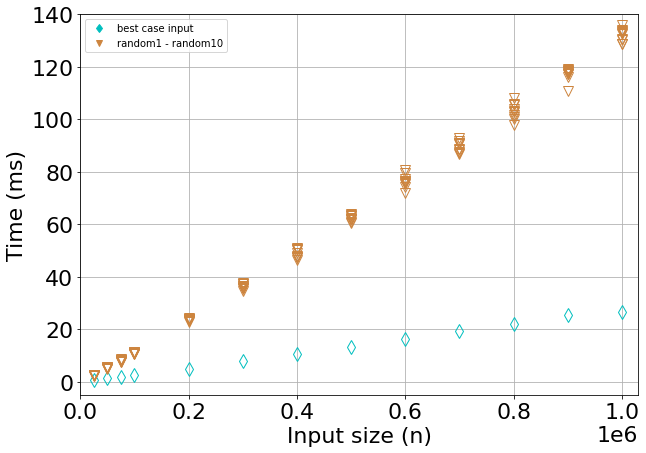

In [52]:
plt.figure(figsize=(10,7))
color = "red"

plt.plot(0,-1111100,"d", color="c",label="best case input")
plt.plot(0,-111110,"v", color="peru",label="random1 - random10")

Rs = []
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "c",dots="d", regLine=False)
for i in range(1,11):
 
   Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "peru",dots="v", regLine=False))

#for i in range(len(Rs)):
    #print(f"random{i} R2", Rs[i][1], " \n")
#print(f"best R2 ", best[1], "\n")

#plt.title("Quick sort wall time vs input size.")
plt.xlabel("Input size (n)", fontsize = 22)
plt.ylabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize = 22)
plt.rc('ytick', labelsize = 22)
plt.grid()
plt.legend()
plt.xlim(-10,1030000)
plt.ylim(-5,140)
plt.show()


# SQ 2: Time vs. big-oh

random0 R2 0.9990045798032399  

random1 R2 0.9992327974199863  

random2 R2 0.9994532300289706  

random3 R2 0.9972555381021101  

random4 R2 0.9994471965910765  

random5 R2 0.9990872457821737  

random6 R2 0.9979373534224064  

random7 R2 0.9982702548115961  

random8 R2 0.9992740308986445  

random9 R2 0.9989210557588849  



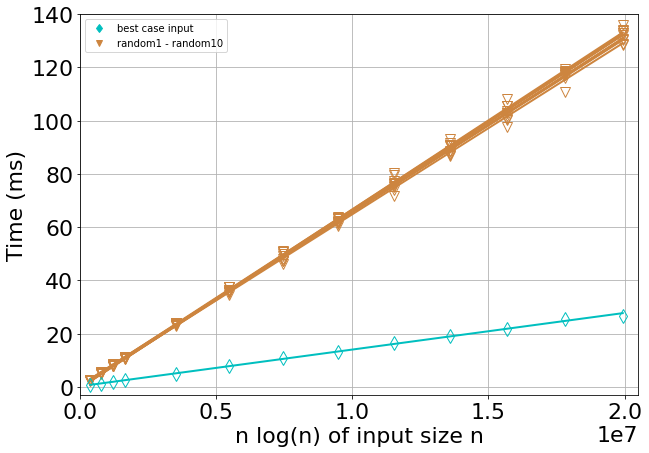

In [48]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []
for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "peru",dots="v"))
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "c",dots="d", regLine=True)

plt.plot(200,20000000,"d", color="c",label="best case input")
plt.plot(2000,20000000,"v", color="peru",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
#print(f"best R2 ", best[1], "\n")

#plt.title("Quick sort wall time vs n log(n) of input size n, with linear regression.")
plt.xlabel("n log(n) of input size n", fontsize = 22)
plt.ylabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize = 22)
plt.rc('ytick', labelsize = 22)
plt.grid()
plt.xlim(-3,20500000)
plt.ylim(-3, 140)
plt.legend()
plt.show()


# E v. T

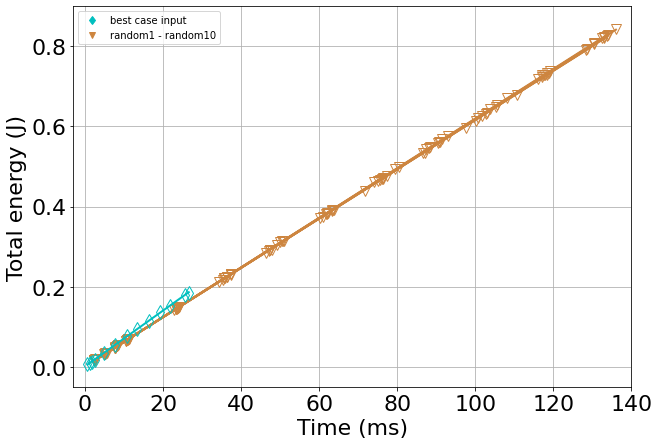

In [49]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "peru",dots="v"))
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "c",dots="d")

plt.plot(300,300,"d", color="c",label="best case input")
plt.plot(3000,3000,"v", color="peru",label="random1 - random10")
#for i in range(len(Rs)):
   # print(f"random{i} R2", Rs[i][1], " \n")
#print(f"best R2 ", best[1], "\n")
#plt.title("Quick sort energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)", fontsize = 22)
plt.xlabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize = 22)
plt.rc('ytick', labelsize = 22)
plt.xlim(-3,140)
plt.ylim(-0.05, 0.9)
plt.legend()
plt.grid()
plt.show()

# EC v. big-oh

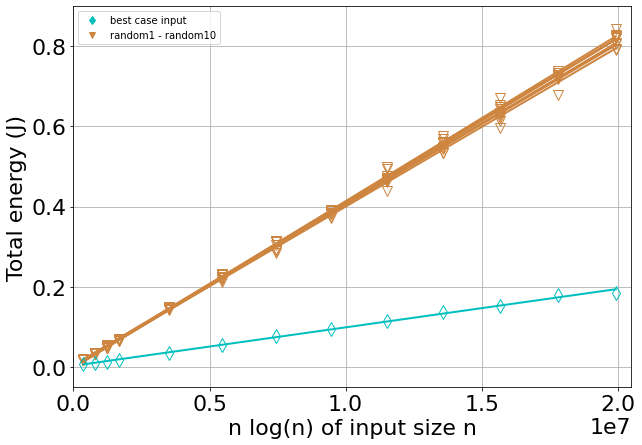

In [51]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

plt.plot(200000,30000000,"d", color="c",label="best case input")
plt.plot(-10000,30000000,"v", color="peru",label="random1 - random10")

for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "peru",dots="v"))
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "c",dots="d",regLine=True)

#for i in range(len(Rs)):
    #print(f"random{i} R2", Rs[i][1], " \n")
#print(f"best R2 ", best[1], "\n")

#plt.title("Quick sort energy consumption vs n log(n) of input size n, with linear regression.")
plt.xlabel("n log(n) of input size n", fontsize = 22)
plt.ylabel("Total energy (J)", fontsize = 22)
plt.rc('xtick', labelsize = 22)
plt.rc('ytick', labelsize = 22)
plt.grid()
plt.xlim(-10000,20500000)
plt.ylim(-0.05, 0.9)
plt.legend()
plt.show()

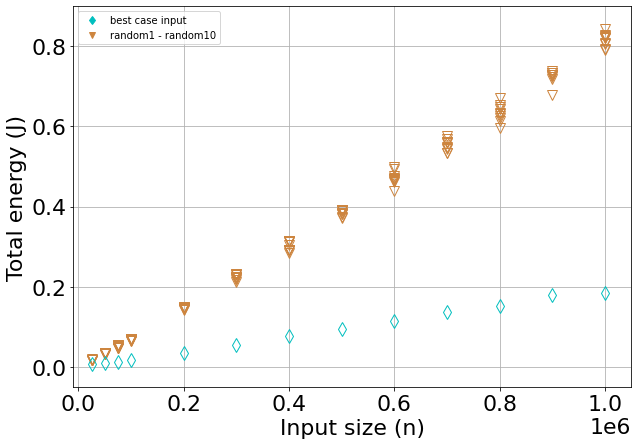

In [53]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "peru",dots="v",regLine=False))
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "c",dots="d",regLine=False)

plt.plot(20000000,10000000,"d", color="c",label="best case input")
plt.plot(20000000,10000000,"v", color="peru",label="random1 - random10")

#for i in range(len(Rs)):
    #print(f"random{i} R2", Rs[i][1], " \n")
#print(f"best R2 ", best[1], "\n")

#plt.title("Quick sort energy consumption vs input size (n).")
plt.xlabel("Input size (n)", fontsize = 22)
plt.ylabel("Total energy (J)", fontsize = 22)
plt.rc('xtick', labelsize = 22)
plt.rc('ytick', labelsize = 22)
plt.grid()
plt.xlim(-10000,1050000)
plt.ylim(-0.05, 0.9)
plt.legend()
plt.show()

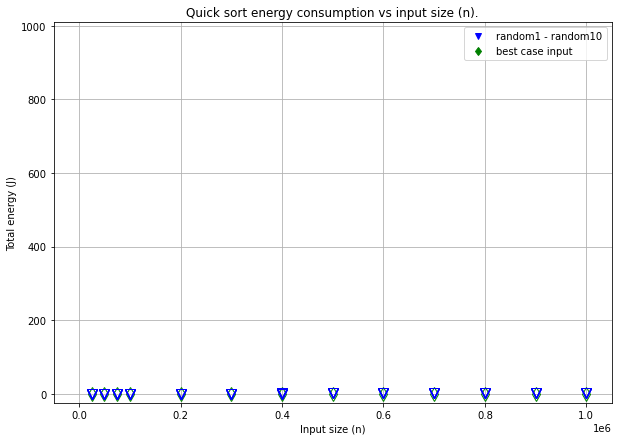

In [40]:
plt.figure(figsize=(1,1))
color = "red"

Rs = []
plt.plot(0000,-10000,"v", color="blue",label="random1 - random10")
plt.plot(0000,-10000,"d", color="green",label="best case input")
# plt.plot(0000,-10000,"s", color="fuchsia",label="worst case input")

# worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "blue",dots="v",regLine=False))
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Quick sort energy consumption vs input size (n).")
plt.xlabel("Input size (n)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.legend()
plt.ylim(-25, 1010)
plt.show()